#### Python으로 CAN 데이터(*.MDF 파일) 확인하기

In [6]:
# 코드 출처 : https://gaussian37.github.io/python-etc-can/
# 코드 일부 수정 (230317)

from asammdf import MDF, Signal   # pip install asammdf 설치
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# MDF 파일 로딩
path = "./Acceleration_StandingStart/"
data = MDF(path + "Acceleration_StandingStart.MDF")

# CAN 신호 리스트 출력
signal_list = list(data.channels_db)

print(signal_list)

['t', 'VehicleSpeed', 'Throttle', 'Gear', 'EngineRpm', 'Brake']


Traceback (most recent call last):
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\signal.py", line 222, in plot
    plot(self, validate=True, index_only=False)
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\gui\plot.py", line 72, in plot
    raise Exception("Signal plotting requires pyqtgraph or matplotlib")
Exception: Signal plotting requires pyqtgraph or matplotlib



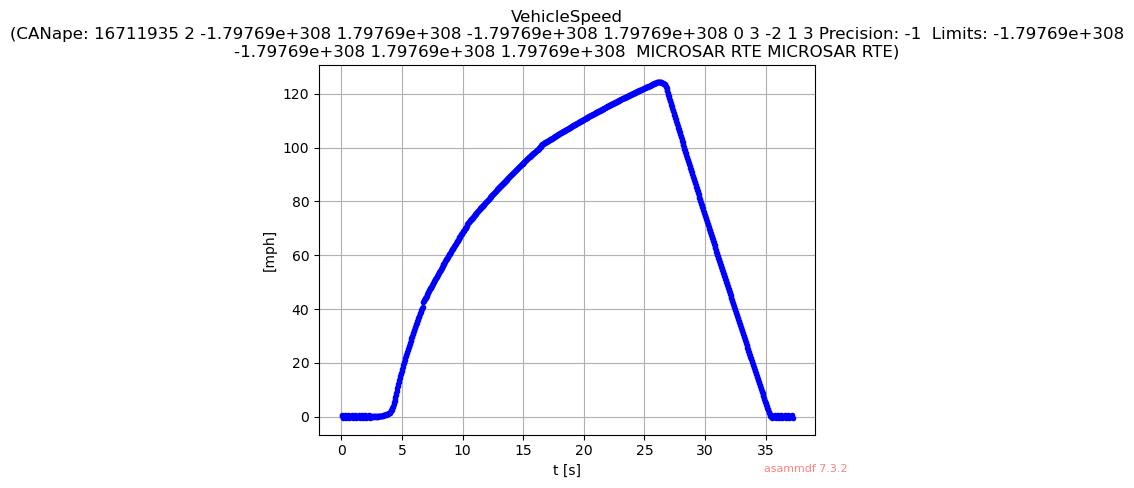

Traceback (most recent call last):
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\signal.py", line 222, in plot
    plot(self, validate=True, index_only=False)
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\gui\plot.py", line 72, in plot
    raise Exception("Signal plotting requires pyqtgraph or matplotlib")
Exception: Signal plotting requires pyqtgraph or matplotlib



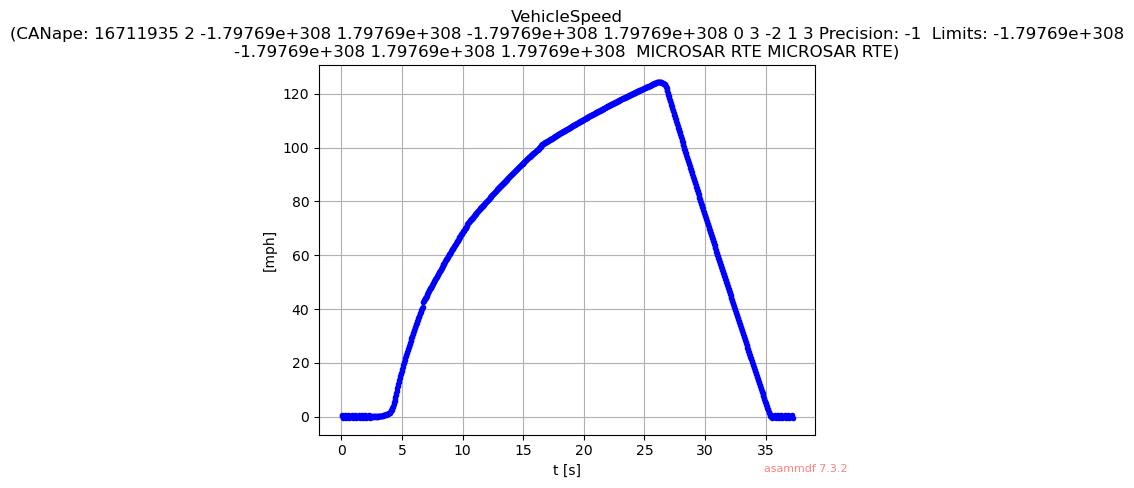

Traceback (most recent call last):
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\signal.py", line 222, in plot
    plot(self, validate=True, index_only=False)
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\gui\plot.py", line 72, in plot
    raise Exception("Signal plotting requires pyqtgraph or matplotlib")
Exception: Signal plotting requires pyqtgraph or matplotlib



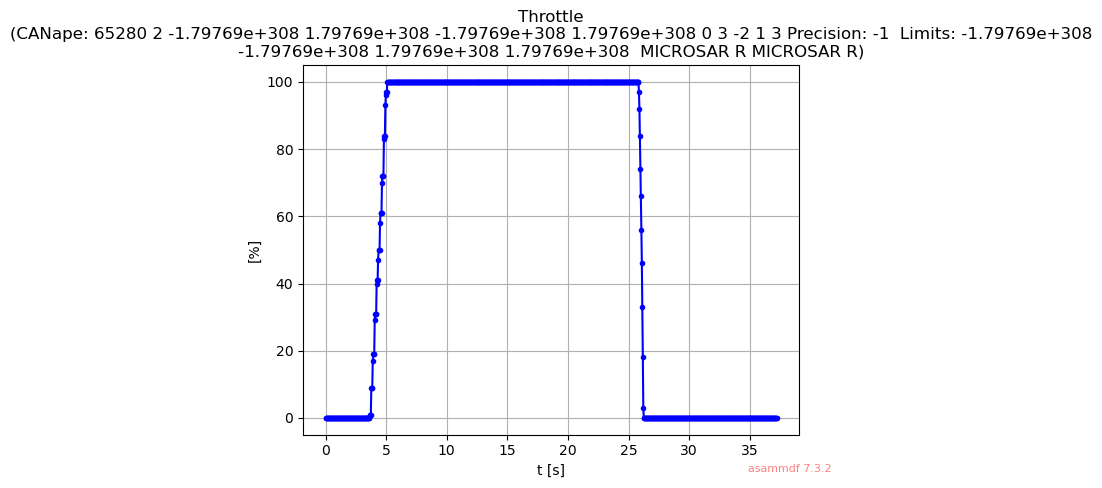

Traceback (most recent call last):
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\signal.py", line 222, in plot
    plot(self, validate=True, index_only=False)
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\gui\plot.py", line 72, in plot
    raise Exception("Signal plotting requires pyqtgraph or matplotlib")
Exception: Signal plotting requires pyqtgraph or matplotlib



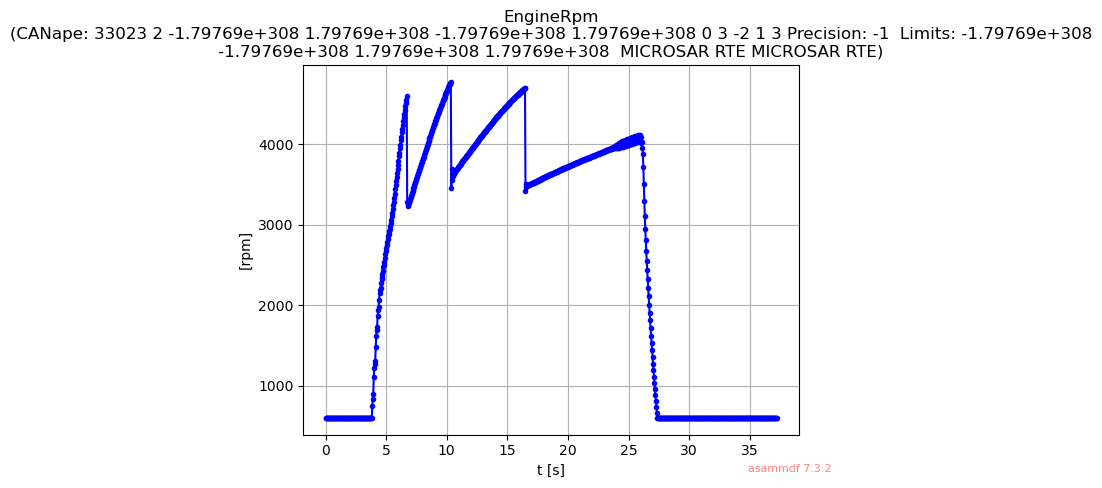

Traceback (most recent call last):
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\signal.py", line 222, in plot
    plot(self, validate=True, index_only=False)
  File "C:\Users\Terry\anaconda3\lib\site-packages\asammdf\gui\plot.py", line 72, in plot
    raise Exception("Signal plotting requires pyqtgraph or matplotlib")
Exception: Signal plotting requires pyqtgraph or matplotlib



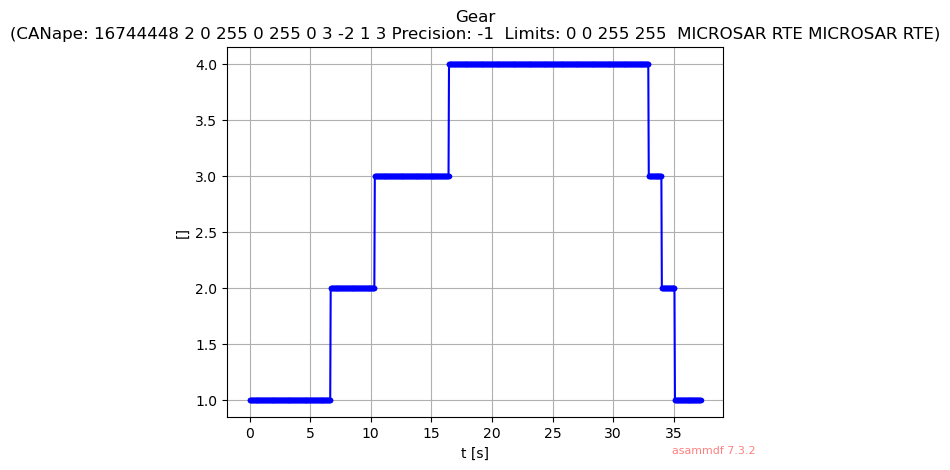

retuirn out


In [9]:
# 그래프 출력
speed = data.get('VehicleSpeed')
speed.plot()

# 필요한 신호만 필터링 
# 원본에서 순서 변경(230317)
filtered_signal_list = ['VehicleSpeed', 'Throttle', 'EngineRpm', 'Gear'] # 모든 항목 추가 (230317)


# 여러 그래프 출력
for signal in data.select(filtered_signal_list):
    signal.plot()


# 10초 ~ 12초 사이의 데이터만 필터링
filtered_data = data.filter(filtered_signal_list).cut(start=10, stop=12)

### 엑셀 파일 또는 CSV 파일로 출력
signals_data_frame = data.to_dataframe()   
# 데이터 프레임 형태로 저장했으니 그래프 작성은 간단 : 아래 코드 다시 추가


signals_data_frame.to_excel(path + "signals_data_frame.xlsx")
signals_data_frame.to_csv(path + "signals_data_frame.csv")

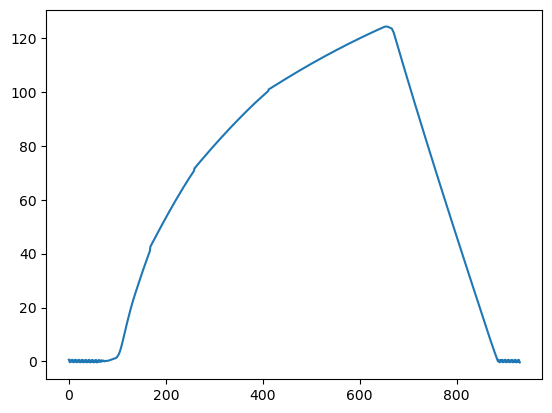

In [10]:
# asammdf 데이터 구조 확인

speed = data.get("VehicleSpeed")
plt.plot(speed[:])   # 센서 값만 출력 / x축 시간 정보 확인 불가 -> plt.plot()으로 그래프 출력하는 방법(230317)

In [11]:
print(speed)
# print(speed[:])

<Signal VehicleSpeed:
	samples=[ 6.07582188e-01  1.31845508e-01 -3.39830314e-01  2.89175688e-01
 -1.84164480e-01  4.43442626e-01 -3.13028574e-02  5.94926217e-01
  1.19240618e-01 -3.52321000e-01  2.76797058e-01 -1.96430557e-01
  4.31050793e-01 -4.35816247e-02  5.82522154e-01  1.06886571e-01
 -3.64799293e-01  2.64430681e-01 -2.08920670e-01  4.18909206e-01
 -5.56124606e-02  5.70836050e-01  9.52475468e-02 -3.76332922e-01
  2.52764323e-01 -2.20244862e-01  4.07923024e-01 -6.62623093e-02
  5.60046154e-01  8.42649362e-02 -3.87216107e-01  2.42214849e-01
 -2.30698492e-01  3.97327259e-01 -7.67614712e-02  5.49877857e-01
  7.43960828e-02 -3.96995638e-01  2.32522969e-01 -2.40066192e-01
  3.87807642e-01 -8.61943175e-02  5.40530093e-01  6.48976701e-02
 -4.06171953e-01  2.23192735e-01 -2.49547842e-01  3.78411229e-01
 -9.55051001e-02  5.31067128e-01  5.55212394e-02 -4.15463555e-01
  2.13984380e-01 -2.58436445e-01  3.69838663e-01 -1.03999559e-01
  5.22649258e-01  4.74164779e-02 -4.23731154e-01  2.0437395

In [12]:
type(speed)

asammdf.signal.Signal

In [13]:
type(speed[:])

numpy.ndarray

### Object가 QuerySet 의 형태 -> 리스트화

In [14]:
# print(speed)
# print(list(speed))
print(list(speed)[0])

[ 6.07582188e-01  1.31845508e-01 -3.39830314e-01  2.89175688e-01
 -1.84164480e-01  4.43442626e-01 -3.13028574e-02  5.94926217e-01
  1.19240618e-01 -3.52321000e-01  2.76797058e-01 -1.96430557e-01
  4.31050793e-01 -4.35816247e-02  5.82522154e-01  1.06886571e-01
 -3.64799293e-01  2.64430681e-01 -2.08920670e-01  4.18909206e-01
 -5.56124606e-02  5.70836050e-01  9.52475468e-02 -3.76332922e-01
  2.52764323e-01 -2.20244862e-01  4.07923024e-01 -6.62623093e-02
  5.60046154e-01  8.42649362e-02 -3.87216107e-01  2.42214849e-01
 -2.30698492e-01  3.97327259e-01 -7.67614712e-02  5.49877857e-01
  7.43960828e-02 -3.96995638e-01  2.32522969e-01 -2.40066192e-01
  3.87807642e-01 -8.61943175e-02  5.40530093e-01  6.48976701e-02
 -4.06171953e-01  2.23192735e-01 -2.49547842e-01  3.78411229e-01
 -9.55051001e-02  5.31067128e-01  5.55212394e-02 -4.15463555e-01
  2.13984380e-01 -2.58436445e-01  3.69838663e-01 -1.03999559e-01
  5.22649258e-01  4.74164779e-02 -4.23731154e-01  2.04373959e-01
 -2.44108809e-01  3.39878

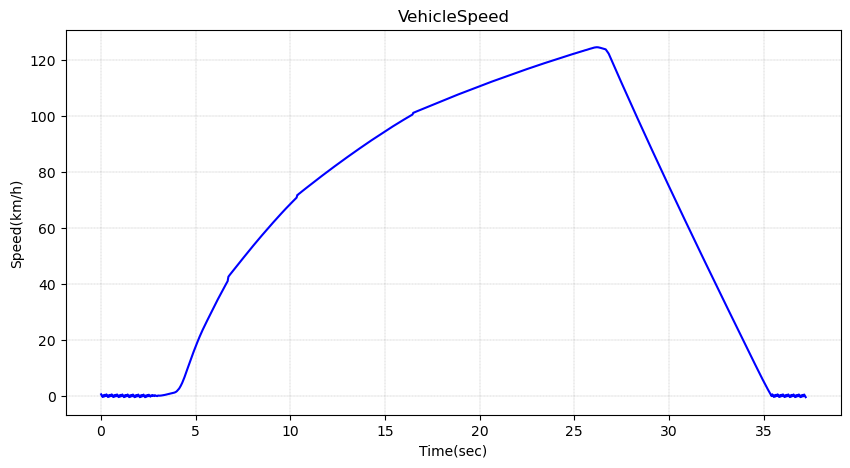

In [16]:
# plt.plot 함수의 기본 사용법 (230317)

plt.figure(figsize=(10,5))

plt.title("VehicleSpeed")
plt.xlabel("Time(sec)")
plt.ylabel("Speed(km/h)")

# 첫번째 데이터는 데이터 값(speed)
# 두번째 데이터는 시간 정보(sec)

plt.plot(list(speed)[1], list(speed)[0], color ='b')  
# 데이터 순서 주의, print(speed)에서 Object 구조 미리 파악(230317)

plt.grid(color='gray', linestyle = '--', linewidth =0.2)

plt.show()

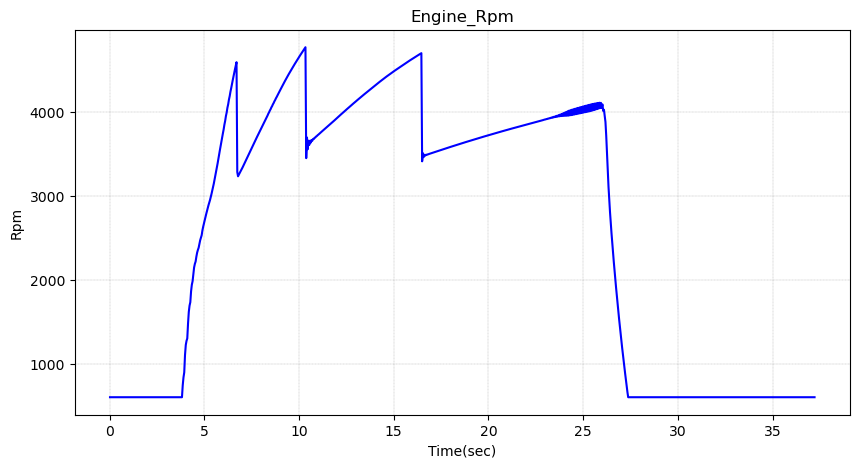

In [19]:
# plt.plot 함수의 기본 사용법 (230317)

Engine_Rpm = data.get("EngineRpm")

plt.figure(figsize=(10,5))

plt.title("Engine_Rpm")
plt.xlabel("Time(sec)")
plt.ylabel("Rpm")

# 첫번째 데이터는 데이터 값(speed)
# 두번째 데이터는 시간 정보(sec)

plt.plot(list(Engine_Rpm)[1], list(Engine_Rpm)[0], color ='b')  
# 데이터 순서 주의, print(speed)에서 Object 구조 미리 파악(230317)

plt.grid(color='gray', linestyle = '--', linewidth =0.2)

plt.show()

### DataFrame을 이용해서 Plot

In [22]:
signals_data_frame.head(10)

,VehicleSpeed,Throttle,Gear,EngineRpm,Brake
timestamps,,,,,
0.00,0.607582,0.0,1,600.0,2281.0
0.04,0.131846,0.0,1,600.0,2282.0
0.08,-0.339830,0.0,1,600.0,2282.0
0.12,0.289176,0.0,1,600.0,2282.0
0.16,-0.184164,0.0,1,600.0,2282.0
0.20,0.443443,0.0,1,600.0,2282.0
0.24,-0.031303,0.0,1,600.0,2281.0
0.28,0.594926,0.0,1,600.0,2281.0
0.32,0.119241,0.0,1,600.0,2282.0


In [24]:
# timestamps가 인덱스로 설정되어 있어 하나의 컬럼으로 변경해야 데이터 사용이 가능하다, (230317)
# 참고 : 인덱스를 열로 변환 -> https://wikidocs.net/155404

signals_data_frame_reset = signals_data_frame.reset_index(level=None, drop=False, 
                                                         inplace=False, col_level=0, col_fill='')
signals_data_frame_reset

,timestamps,VehicleSpeed,Throttle,Gear,EngineRpm,Brake
0,0.000,0.607582,0.0,1,600.0,2281.0
1,0.040,0.131846,0.0,1,600.0,2282.0
2,0.080,-0.339830,0.0,1,600.0,2282.0
3,0.120,0.289176,0.0,1,600.0,2282.0
4,0.160,-0.184164,0.0,1,600.0,2282.0
...,...,...,...,...,...,...
926,37.040,0.391834,0.0,1,600.0,2281.0
927,37.079,-0.082204,0.0,1,600.0,2281.0
928,37.120,0.544248,0.0,1,600.0,2283.0
929,37.160,0.068818,0.0,1,600.0,2283.0


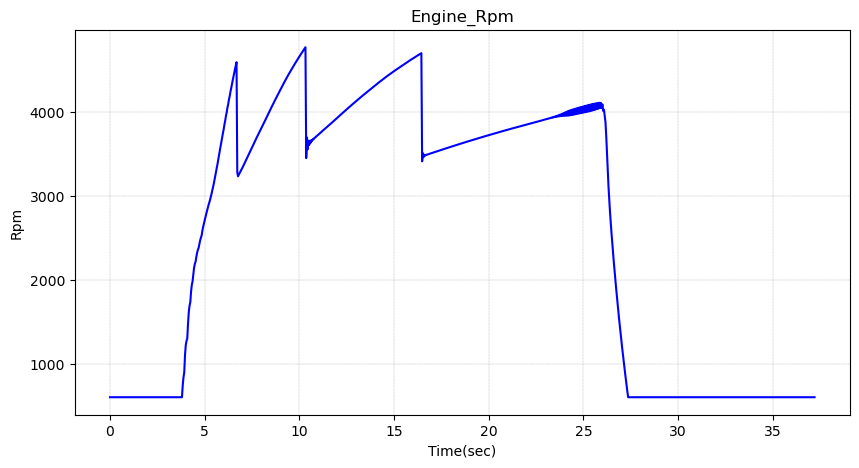

In [25]:
# 위의 데이터프레임을 이용하여 plt.plot()

plt.figure(figsize=(10,5))

plt.title("Engine_Rpm")
plt.xlabel("Time(sec)")
plt.ylabel("Rpm")

# 첫번째 데이터는 데이터 값(speed)
# 두번째 데이터는 시간 정보(sec)

plt.plot(signals_data_frame_reset['timestamps'],signals_data_frame_reset['EngineRpm'], color ='b')  

plt.grid(color='gray', linestyle = '--', linewidth =0.2)

plt.show()